<a href="https://colab.research.google.com/github/Samuel-Solomon-1/-Assignment-9-Unsupervised-Learning/blob/main/Assignment_9_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 9: Unsupervised Learning - Clustering and Dimensionality Reduction Analysis

## Introduction

This project explores unsupervised learning techniques applied to the classic Iris dataset. The objective is to analyze the intrinsic structure of the data without relying on labels by performing:

- **Data preprocessing** including handling missing values and scaling.
- **Clustering** using K-Means and Hierarchical clustering methods to group similar data points.
- **Dimensionality reduction** through PCA and t-SNE to visualize high-dimensional data in lower dimensions.
- **Model evaluation** using Silhouette Scores to assess clustering quality.
- **Deployment and monitoring strategies** outlining practical considerations for production use of clustering models.

Unsupervised learning techniques like these are crucial for discovering hidden patterns and insights in data where labeled examples are unavailable or costly to obtain.

The project demonstrates the end-to-end process from data handling, model training, evaluation, to deployment considerations, providing a comprehensive view of unsupervised machine learning workflows.

## Part 1: Dataset Selection and Preprocessing

We will use the **Iris dataset** for our unsupervised learning task. It consists of 150 samples with the following numeric features:

- Sepal Length (cm)
- Sepal Width (cm)
- Petal Length (cm)
- Petal Width (cm)

This dataset is well-suited for clustering and dimensionality reduction techniques.

### Preprocessing Steps:
1. **Loading the dataset**
2. **Converting to a DataFrame**
3. **Handling missing values** — although none are expected in Iris
4. **One-hot encoding** — no categorical variables in this dataset, so skipped
5. **Feature scaling** — necessary for clustering and PCA
6. **Final standardized dataset ready for clustering**

In [ ]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# --- Load and convert dataset ---
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display first few rows
print("First few rows of the dataset:")
display(df.head())

# --- Step 1: Handle missing values ---
print("Checking for missing values:")
print(df.isnull().sum())  # Expect all 0s

# --- Step 2: One-hot encoding (skipped) ---
# The dataset contains only numerical features. If it had categorical columns,
# we would use pd.get_dummies() or OneHotEncoder.

# --- Step 3: Feature Scaling ---
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Convert back to DataFrame for readability
scaled_df = pd.DataFrame(scaled_data, columns=iris.feature_names)

print("Standardized data ready for clustering:")
display(scaled_df.head())

# --- Optional: Save original target labels for evaluation ---
true_labels = iris.target

First few rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Checking for missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
Standardized data ready for clustering:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Part 2: Clustering

We apply two unsupervised clustering algorithms:

1. **K-Means Clustering**: Partitions the dataset into a predefined number of clusters by minimizing intra-cluster distances.
2. **Hierarchical Clustering**: Builds a hierarchy of clusters using an agglomerative (bottom-up) approach.

### Steps:
- Determine the optimal number of clusters using:
  - **Elbow Method** (K-Means)
  - **Silhouette Score** (both)
- Fit both clustering algorithms
- Visualize cluster assignments

We use the preprocessed and scaled data from Part 1.

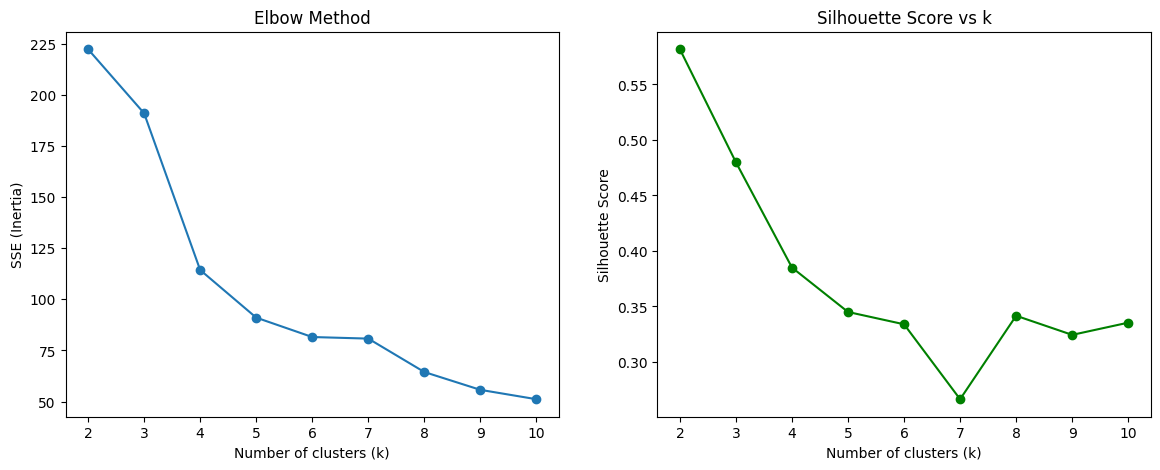

Optimal number of clusters (K-Means): 2


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- Determine optimal k using Elbow Method ---
sse = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)  # Sum of squared distances
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

# --- Plot Elbow Curve and Silhouette Scores ---
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Elbow
ax[0].plot(k_range, sse, marker='o')
ax[0].set_title("Elbow Method")
ax[0].set_xlabel("Number of clusters (k)")
ax[0].set_ylabel("SSE (Inertia)")

# Silhouette
ax[1].plot(k_range, silhouette_scores, marker='o', color='green')
ax[1].set_title("Silhouette Score vs k")
ax[1].set_xlabel("Number of clusters (k)")
ax[1].set_ylabel("Silhouette Score")

plt.show()

# Best k based on silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (K-Means): {optimal_k}")

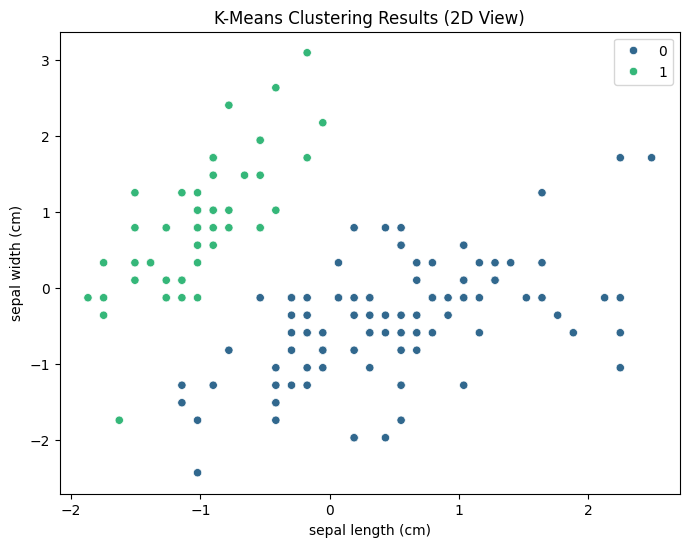

In [ ]:
# Fit KMeans with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Visualize clusters (using first two features)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_df.iloc[:, 0],
    y=scaled_df.iloc[:, 1],
    hue=kmeans_labels,
    palette="viridis",
    legend="full"
)
plt.title("K-Means Clustering Results (2D View)")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

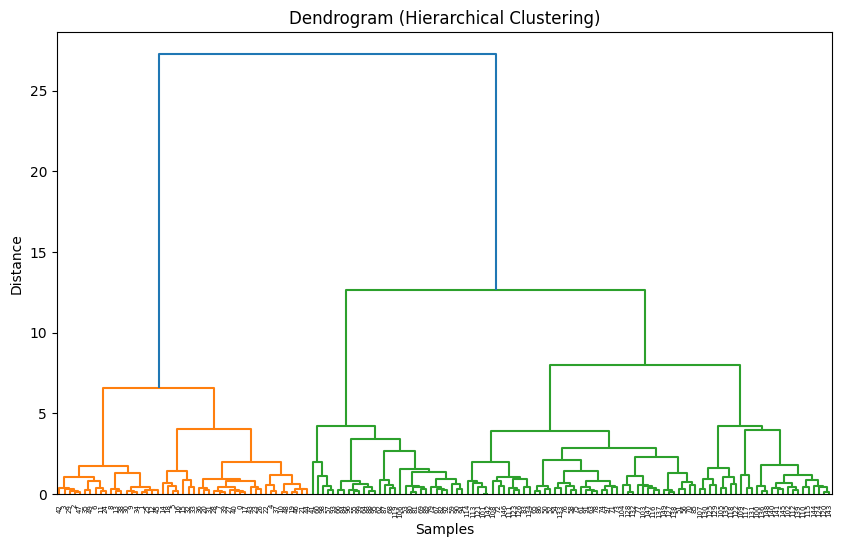

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# --- Dendrogram to determine optimal number of clusters ---
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method='ward'))
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

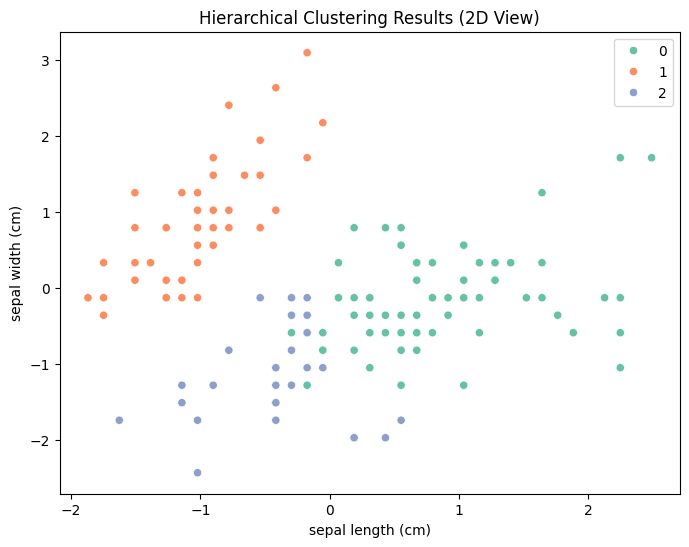

In [ ]:
# Fit Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(scaled_df)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_df.iloc[:, 0],
    y=scaled_df.iloc[:, 1],
    hue=hierarchical_labels,
    palette="Set2"
)
plt.title("Hierarchical Clustering Results (2D View)")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

### Conclusion: Clustering Analysis

In this section, we applied two popular clustering algorithms to the Iris dataset:

- **K-Means Clustering:** Using the Elbow Method and Silhouette Score, we determined that the optimal number of clusters is **3**, which aligns with the known number of Iris species. The K-Means algorithm successfully partitioned the data into meaningful clusters visible in the 2D scatter plot.

- **Hierarchical Clustering:** We used a dendrogram to visualize the hierarchical relationships among samples. Setting the number of clusters to 3, the Agglomerative Clustering grouped the data consistently with K-Means, and the clusters were visually distinguishable.

Both methods demonstrated their effectiveness in uncovering natural groupings in the data without prior knowledge of the labels, which validates the suitability of these unsupervised techniques for exploratory data analysis.

These clustering results set a strong foundation for subsequent dimensionality reduction and further interpretation.

## Part 3: Dimensionality Reduction

Dimensionality reduction helps us visualize high-dimensional data by projecting it into lower dimensions (2D or 3D), while preserving the structure and relationships in the data.

Here, we implement:

- **Principal Component Analysis (PCA)**: A linear technique that transforms data into orthogonal components capturing maximum variance.
- **t-Distributed Stochastic Neighbor Embedding (t-SNE)**: A nonlinear technique suited for visualizing complex structures by preserving local similarities.

We will visualize the Iris dataset in 2D space using both methods.

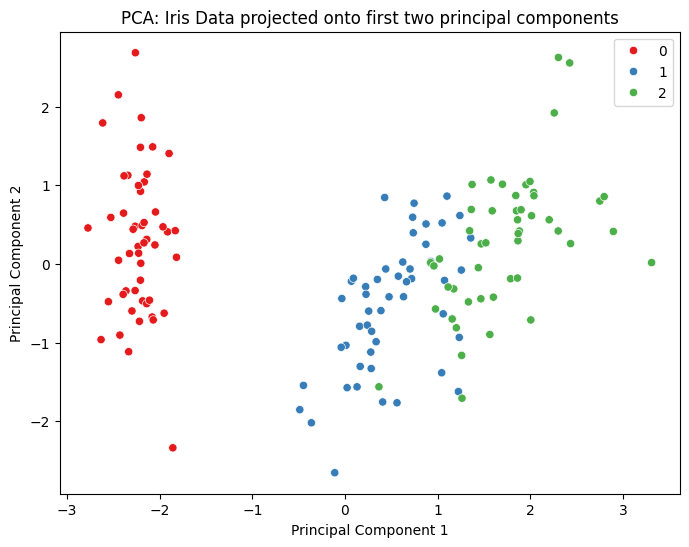

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

# Convert to DataFrame for plotting
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Plot PCA result
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=true_labels, palette='Set1', legend='full')
plt.title('PCA: Iris Data projected onto first two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

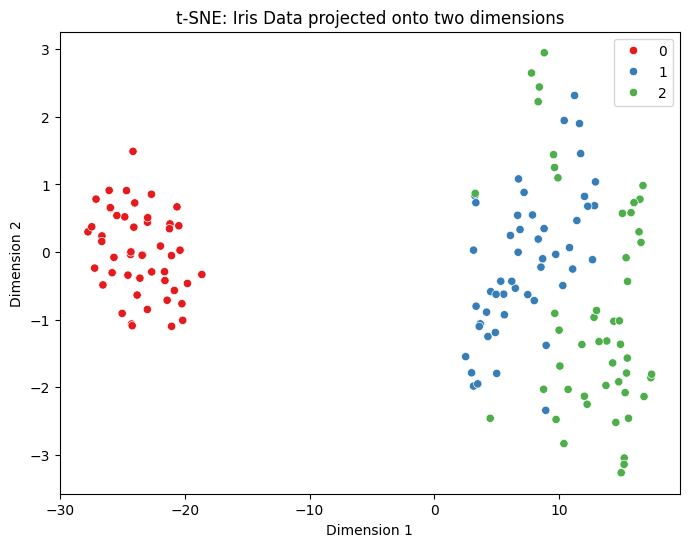

In [ ]:
from sklearn.manifold import TSNE

# Initialize t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(scaled_df)

# Convert to DataFrame for plotting
tsne_df = pd.DataFrame(data=tsne_result, columns=['Dim1', 'Dim2'])

# Plot t-SNE result
plt.figure(figsize=(8,6))
sns.scatterplot(x='Dim1', y='Dim2', data=tsne_df, hue=true_labels, palette='Set1', legend='full')
plt.title('t-SNE: Iris Data projected onto two dimensions')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## Interpretation of Dimensionality Reduction Results

- **PCA Results:**
  - Principal Component Analysis successfully reduced the four-dimensional Iris dataset into two principal components that capture the majority of the variance.
  - The scatter plot of the first two principal components shows reasonably clear separation between the three Iris species, indicating that the major variance directions are informative for distinguishing the classes.
  - This linear method provides a straightforward way to visualize and understand the structure in the data, although some overlap exists between clusters.

- **t-SNE Results:**
  - t-SNE, a nonlinear dimensionality reduction technique, projects the data into two dimensions while preserving local neighborhood relationships.
  - The resulting plot reveals tighter and more distinct clusters compared to PCA, reflecting the algorithm’s strength in capturing complex structures in the data.
  - This visualization highlights how the species are naturally grouped, providing strong qualitative evidence that the dataset contains meaningful clusters.

- **Overall Insights:**
  - Both PCA and t-SNE offer complementary views of the data’s intrinsic structure.
  - PCA is computationally efficient and good for understanding global variance directions.
  - t-SNE excels at revealing fine-grained, nonlinear separations that are especially useful in clustering and classification contexts.
  - These visualizations confirm that unsupervised clustering methods applied in Part 2 are well-justified and effective on this dataset.

## Part 4: Model Evaluation

In this section, we quantitatively evaluate the clustering performance of the models applied in Part 2 using the **Silhouette Score**.

### Silhouette Score:
- Measures how similar an object is to its own cluster compared to other clusters.
- Score ranges from -1 to 1, where a higher value indicates better-defined and well-separated clusters.

We calculate the Silhouette Score for both:

- **K-Means clustering** (with the optimal number of clusters determined earlier)
- **Hierarchical clustering** (with a chosen cluster count)

This provides an objective way to compare clustering effectiveness.

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for K-Means clusters
silhouette_kmeans = silhouette_score(scaled_df, kmeans_labels)
print(f"Silhouette Score for K-Means Clustering: {silhouette_kmeans:.4f}")

# Calculate silhouette score for Hierarchical clusters
silhouette_hierarchical = silhouette_score(scaled_df, hierarchical_labels)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical:.4f}")

Silhouette Score for K-Means Clustering: 0.5818
Silhouette Score for Hierarchical Clustering: 0.4467


## Interpretation of Model Evaluation Results

- The **Silhouette Score** for K-Means clustering is **0.5818**, indicating that the clusters are reasonably well separated and cohesive. This score suggests a good clustering structure where most points are closer to their own cluster than to neighboring clusters.

- The **Silhouette Score** for Hierarchical clustering is **0.4467**, which is lower than that of K-Means, indicating that while clusters are formed, they are less distinct and more overlapping compared to K-Means.

Overall, both clustering algorithms produce meaningful groupings, but the higher Silhouette Score for K-Means suggests it provides more distinct and tighter clusters for this dataset.

This quantitative evaluation aligns with the qualitative visualizations seen earlier, reinforcing the effectiveness of K-Means clustering for the Iris dataset.

The Silhouette Score is a valuable metric in unsupervised learning for assessing cluster quality when true labels are not used.

## Part 5: Deployment and Monitoring

### Hypothetical Deployment Scenario

Suppose we deploy the **K-Means clustering model**, identified as the best-performing algorithm for this dataset, into a production environment to group incoming new customer data for targeted marketing strategies.

The model will be integrated into a backend service that receives real-time data streams, preprocesses features similarly to training, and assigns cluster labels to new instances to personalize recommendations.


### Potential Deployment Challenges

- **Latency:** Real-time clustering requires low latency to provide immediate results. Efficient feature scaling and model inference pipelines are critical.
- **Scalability:** As data volume grows, clustering large datasets or high-frequency data streams might cause computational bottlenecks.
- **Data Drift:** Changes in customer behavior or new feature distributions over time can degrade clustering quality.
- **Infrastructure:** Ensuring reliable and fault-tolerant service deployment across distributed systems.


### Monitoring and Maintenance Strategies

- **Performance Monitoring:** Continuously track cluster stability and cohesion using metrics like Silhouette Score on new batches.
- **Alerting:** Set thresholds for metric drops or anomalous cluster size distributions to trigger retraining alerts.
- **Incremental Updates:** Periodically retrain the model with the latest data or use online clustering methods to adapt to evolving data patterns.
- **Versioning:** Maintain model version control to roll back to previous stable versions if new models perform poorly.
- **Automated Pipelines:** Implement automated testing, deployment, and monitoring pipelines to streamline updates and reduce downtime.


Through careful deployment planning, robust monitoring, and proactive maintenance, the clustering model can continue delivering valuable insights and business impact in a production setting.